  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Tersedia di: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt
                
Link dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PROCESSING

In [2]:
def load_data(filename):
    df = pd.read_csv(filename)
    return df

In [3]:
df = load_data('bank-additional.csv')

In [4]:
df.shape

(4119, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Catatan: 
* Terdapat 4119 data dengan 21 variabel termasuk dengan label 'y' 


# DATA PREPARATION

* Memeriksa dan menangani jika ada nilai yang hilang // missing value 
* Memeriksa dan mempelajari lebih lanjut tentang nilai di setiap variabel 
* Memeriksa nilai dan menentukan apakah ingin: memasukkan nilai // imputasi, menghapus entri atau variabel 

### Missing Values

In [125]:
# mengecek data null

df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Values Count

Untuk lebih mudah dalam menganalisis variabel, dapat memisahkannya ke dalam categorial dan numeric 

In [7]:
# list untuk memisahkan numeric dan categorial variabel berdasarkan tipe data

num = []
cat = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat.append(col)
    else: 
        num.append(col)

print('categorial ' + repr(cat))
print('numeric ' + repr(num))

categorial ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
numeric ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
# mengecek nilai unik dari tiap variabel dan persentase di tiap variabel
# untuk setiap variabel yang bernilai categorial

for i in cat:
    print('Nilai dari tiap kolom ' + i + ': ' + repr(df[i].nunique()) + '\n' + repr(round(df[i].value_counts(normalize = True)* 100, 2)) + '\n')

Nilai dari tiap kolom job: 12
admin.           24.57
blue-collar      21.46
technician       16.78
services          9.54
management        7.87
retired           4.03
self-employed     3.86
entrepreneur      3.59
unemployed        2.69
housemaid         2.67
student           1.99
unknown           0.95
Name: job, dtype: float64

Nilai dari tiap kolom marital: 4
married     60.91
single      27.99
divorced    10.83
unknown      0.27
Name: marital, dtype: float64

Nilai dari tiap kolom education: 8
university.degree      30.69
high.school            22.36
basic.9y               13.94
professional.course    12.99
basic.4y               10.42
basic.6y                5.54
unknown                 4.05
illiterate              0.02
Name: education, dtype: float64

Nilai dari tiap kolom default: 3
no         80.48
unknown    19.50
yes         0.02
Name: default, dtype: float64

Nilai dari tiap kolom housing: 3
yes        52.80
no         44.65
unknown     2.55
Name: housing, dtype: float64

N

### dealing data "unknown"

#### "Unknown"

terdapat nilai unknown, dilakukan  
pengisian nilai untuk: 
    1. marital
    2. education
    3. housing
    4. loan
    5. default

In [9]:
# fungsi untuk menghilangkan nilai unknown dan mengembalikan nilai random dari nilai untuk nilai unknown 

def impute_values(variable, values, prob):
    if variable == 'unknown':
        return np.random.choice(values, p=prob)
    else: 
        return variable 

#### martial

In [10]:
# nilai unik apa saja dan menghapus nilai unknown

values = list(set(df.marital.values))
values.remove('unknown')
values

['single', 'divorced', 'married']

In [11]:
# bobot // probabilitas kemunculan tiap setiap nilai dalam variabel

prob = df[df['marital'] != 'unknown'].marital.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.6107594936708861, 0.28067185978578385, 0.1085686465433301]

In [12]:
# distribusi nilai

df.marital.value_counts(normalize=True)

married     0.609128
single      0.279922
divorced    0.108279
unknown     0.002671
Name: marital, dtype: float64

In [13]:
# impute nilai untuk nilai 'unknown'

df.marital = df.marital.map(lambda x: impute_values(x, values, prob))

In [14]:
# distribusi nilai baru

df.marital.value_counts(normalize=True)

married     0.609128
single      0.282350
divorced    0.108521
Name: marital, dtype: float64

#### housing

In [15]:
values = list(set(df.housing.values))
values.remove('unknown')
values

['yes', 'no']

In [16]:
prob = df[df['housing'] != 'unknown'].housing.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.5418535127055306, 0.4581464872944694]

In [17]:
df.housing.value_counts(normalize=True)

yes        0.528041
no         0.446468
unknown    0.025492
Name: housing, dtype: float64

In [18]:
df.housing = df.housing.map(lambda x: impute_values(x, values, prob))


In [19]:
df.housing.value_counts(normalize=True)

yes    0.542122
no     0.457878
Name: housing, dtype: float64

#### education

In [20]:
values = list(set(df.education.values))
values.remove('unknown')
values

['high.school',
 'illiterate',
 'basic.9y',
 'basic.4y',
 'professional.course',
 'university.degree',
 'basic.6y']

In [21]:
prob = df[df['education'] != 'unknown'].education.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.31983805668016196,
 0.23304655870445345,
 0.14524291497975708,
 0.1353744939271255,
 0.10855263157894737,
 0.057692307692307696,
 0.00025303643724696357]

In [22]:
df.education.value_counts(normalize=True)


university.degree      0.306871
high.school            0.223598
basic.9y               0.139354
professional.course    0.129886
basic.4y               0.104151
basic.6y               0.055353
unknown                0.040544
illiterate             0.000243
Name: education, dtype: float64

In [23]:
df.education = df.education.map(lambda x: impute_values(x, values, prob))


In [24]:
df.education.value_counts(normalize=True)



university.degree      0.309541
high.school            0.238893
basic.9y               0.145181
professional.course    0.134984
basic.4y               0.107308
basic.6y               0.055353
illiterate             0.008740
Name: education, dtype: float64

#### loan

In [25]:
values = list(set(df.loan.values))
values.remove('unknown')
values

['yes', 'no']

In [26]:
prob = df[df['loan'] != 'unknown'].loan.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.8343298455406079, 0.16567015445939212]

In [27]:
df.loan.value_counts(normalize=True)


no         0.813061
yes        0.161447
unknown    0.025492
Name: loan, dtype: float64

In [28]:
df.loan = df.loan.map(lambda x: impute_values(x, values, prob))

In [29]:
df.loan.value_counts(normalize=True)

no     0.817431
yes    0.182569
Name: loan, dtype: float64

### default

In [30]:
values = list(set(df.default.values))
values.remove('unknown')
values

['yes', 'no']

In [31]:
prob = df[df['default'] != 'unknown'].default.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.9996984318455971, 0.00030156815440289503]

In [32]:
df.default.value_counts(normalize=True)


no         0.804807
unknown    0.194950
yes        0.000243
Name: default, dtype: float64

In [33]:
df.default = df.default.map(lambda x: impute_values(x, values, prob))

selesai untuk cleaning data. sekarang untuk memvisualisasikan, mengexplor dan memulai transformasi data untuk memodelkannya.


### DATA EXPLORATORY & FEATURE TRANSFORMATION

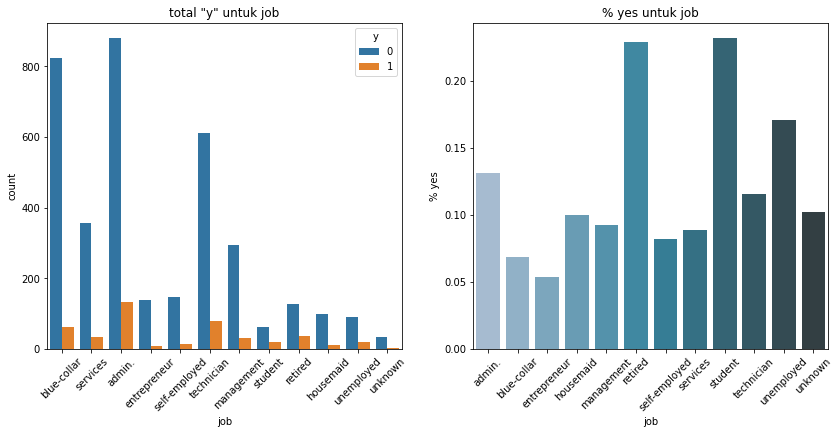

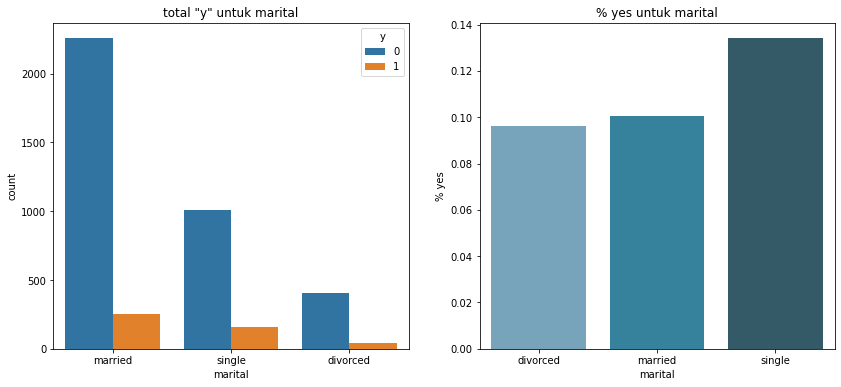

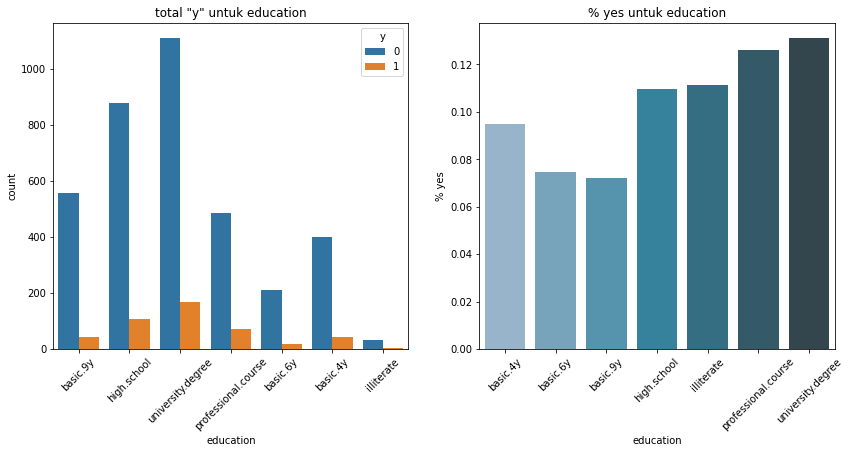

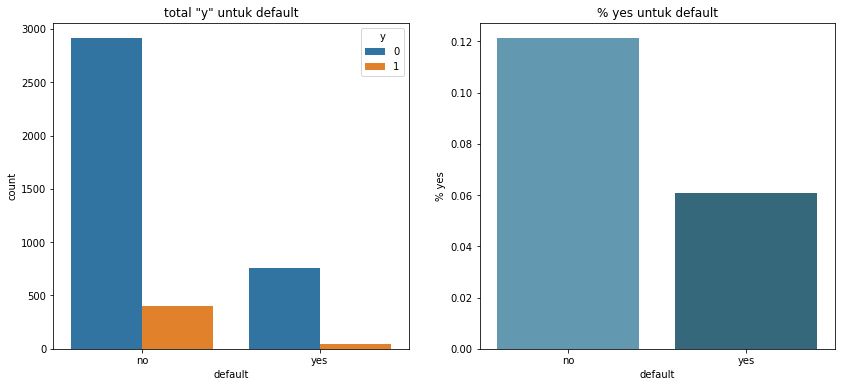

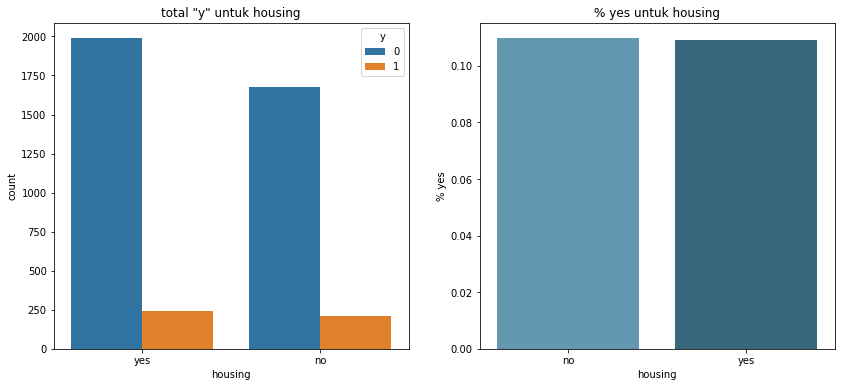

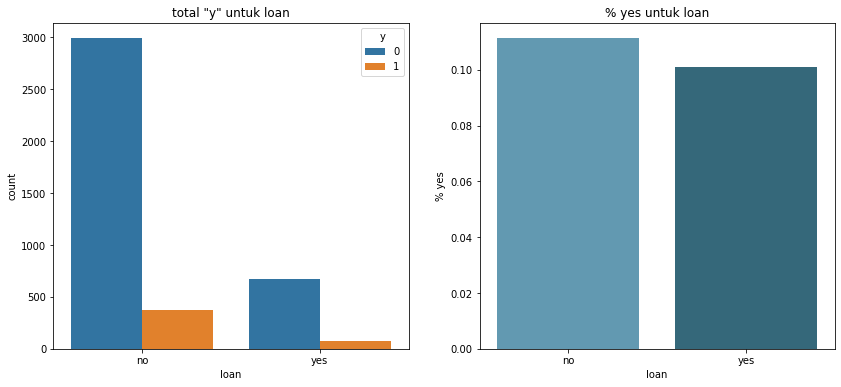

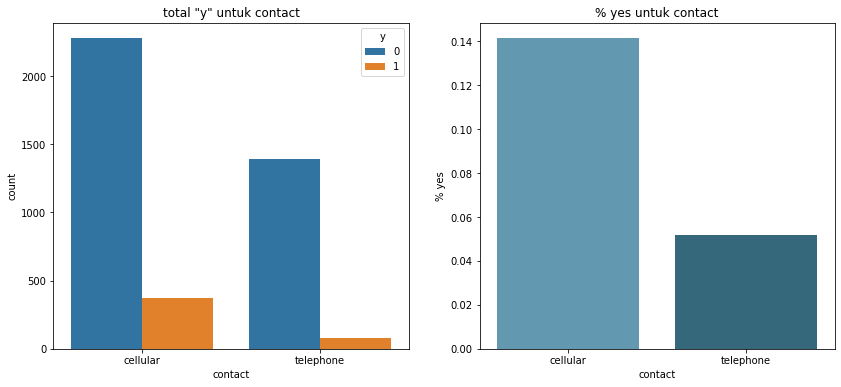

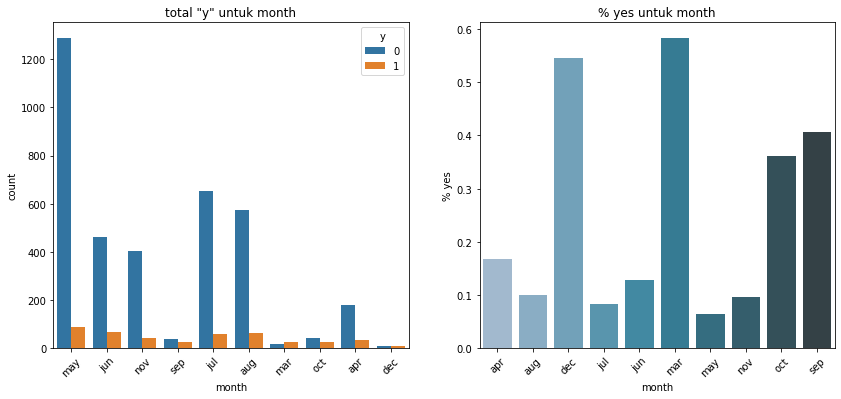

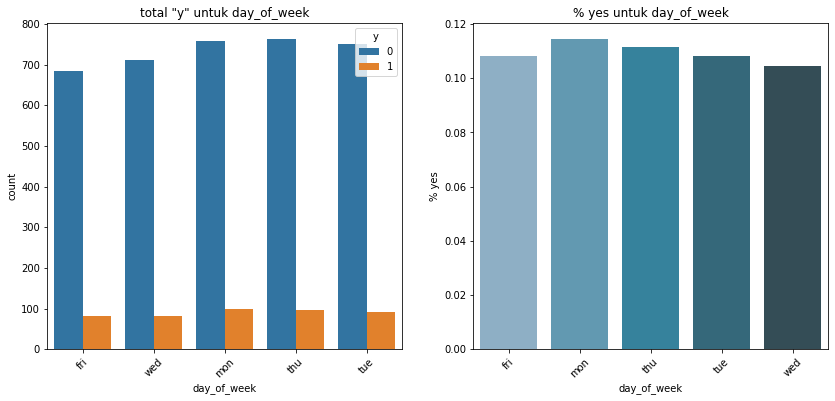

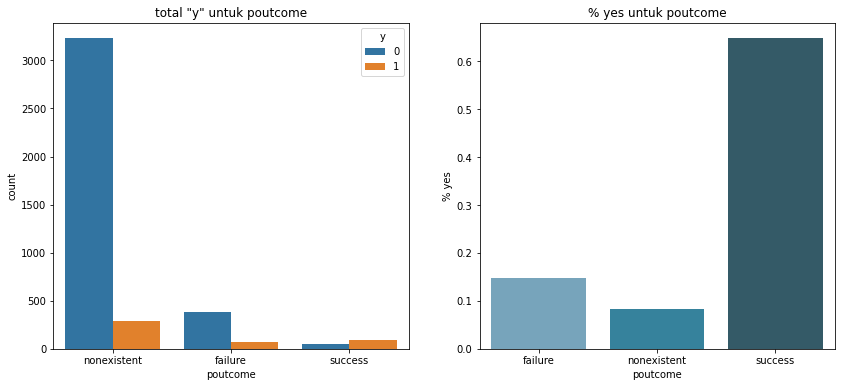

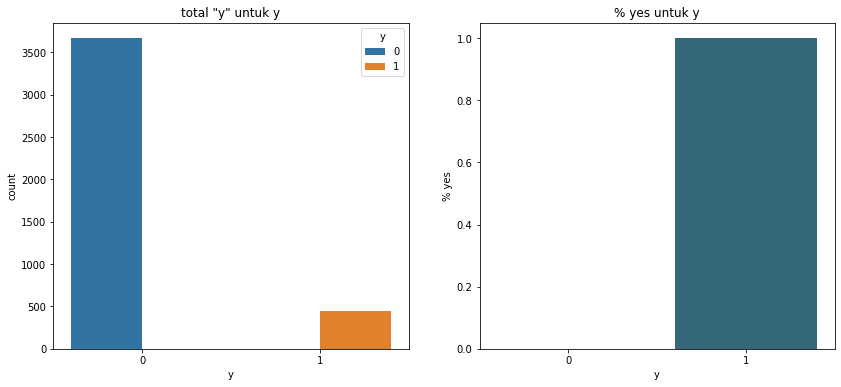

In [34]:
# plotting jumlah nilai, iterasi categorial variabel dan persentasi 'y' untuk seluruh nilai

cat_data = df[cat]
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)

for col in cat_data.columns.values:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title('total "y" untuk '+ col)
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% yes')
    plt.title('% yes untuk ' + col)
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.show()

Variabel yang perlu diperhatikan adalah: job_student, job_retired, marital_single, contact_cellular

Variabel yang mungkin tidak terlalu membantu: Bulan, Hari dalam seminggu, rumah, pinjaman, pendidikan

In [35]:
# plotting untuk nilai numeric

def plot_cont(num_data):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nRows = len(num_data.columns) //2 +1 
    nCols = 2
    
    for i, t in enumerate(list(num_data.columns)):
        ax = fig.add_subplot(nRows, nCols, i+1)
        sns.distplot(a= num_data[t],   
                     ax=ax)
        plt.title(t + '_distribution')

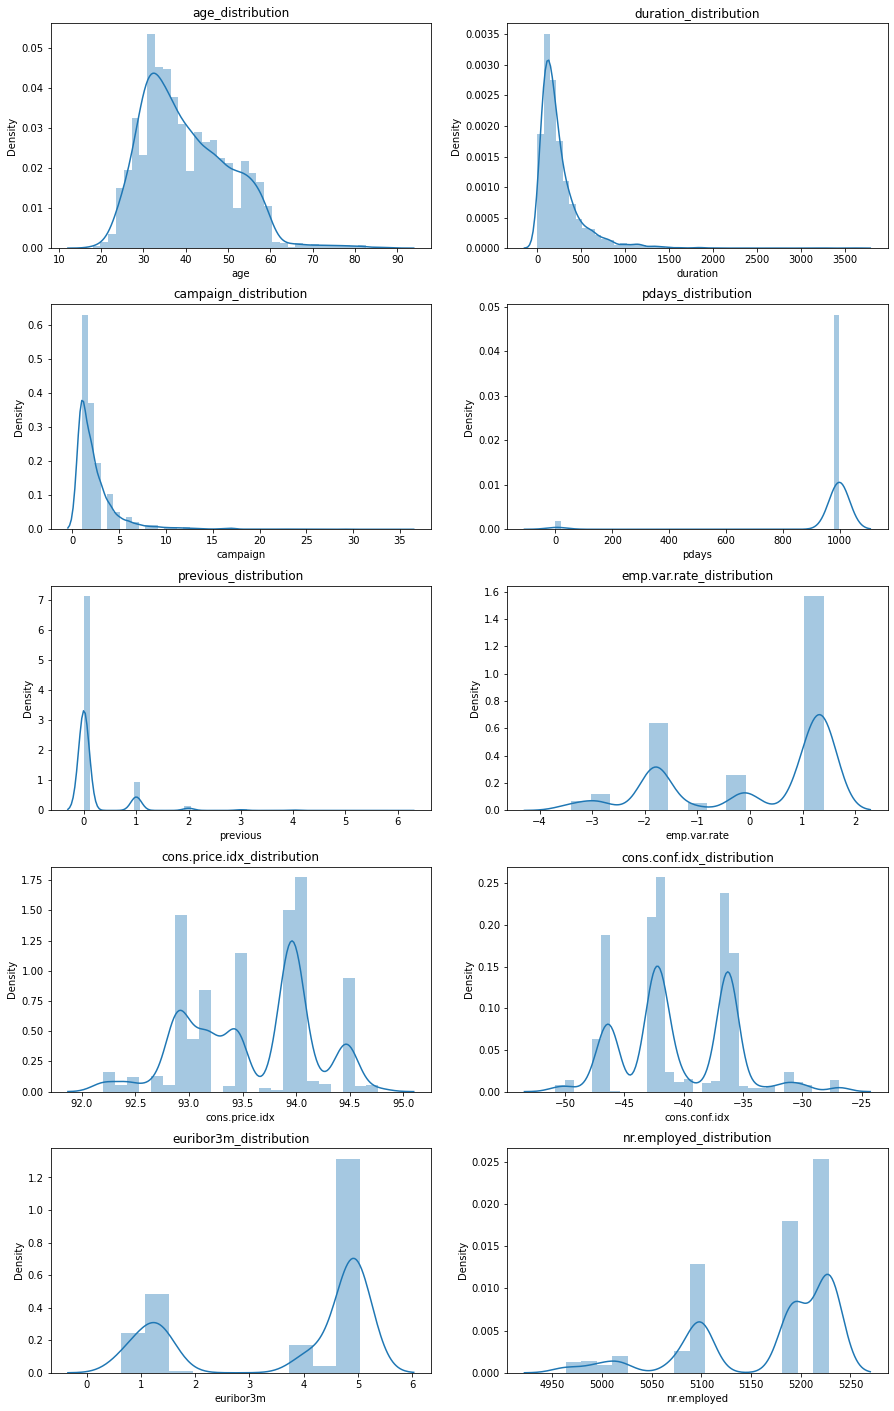

In [36]:
num_data = df[num]
plot_cont(num_data)

### transform

ML model tidak bisa membaca text string, melakukan transform untuk categorial variabel. data yang tersedia memuat data dalam tipe objek, dalam python tipe data objek merupakan tipe data bukan angka. Maka perlu diubah terlebih dahulu kedalam bentuk data kategorik

In [38]:
df_new = df.select_dtypes(include = ['object']).copy()
nRows, nCols = df_new.shape

for index in range(0, nCols):
    header = df_new.columns[index]
    df_new[header] = df_new[header].astype("category")
    df_new[header] = df_new[header].cat.codes
    df[header] = df_new[header]
    
df_num = df
df_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,1,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,0,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,1,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [39]:
df_num.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,3.824958,1.173829,3.629522,0.195193,0.542122,0.182569,0.356154,4.294975,2.009711,...,2.537266,960.422190,0.190337,0.924253,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,3.606319,0.600619,2.066797,0.396397,0.498283,0.386359,0.478920,2.305188,1.389233,...,2.568159,191.922786,0.541788,0.372816,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,3.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,11.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,...,35.000000,999.000000,6.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Correlation Heatmaps

memeriksa nilai yang sangat berkorelasi (strong // highly corelation) dan mempertimbangkan untuk menghapusnya dari data kami untuk pemodelan.

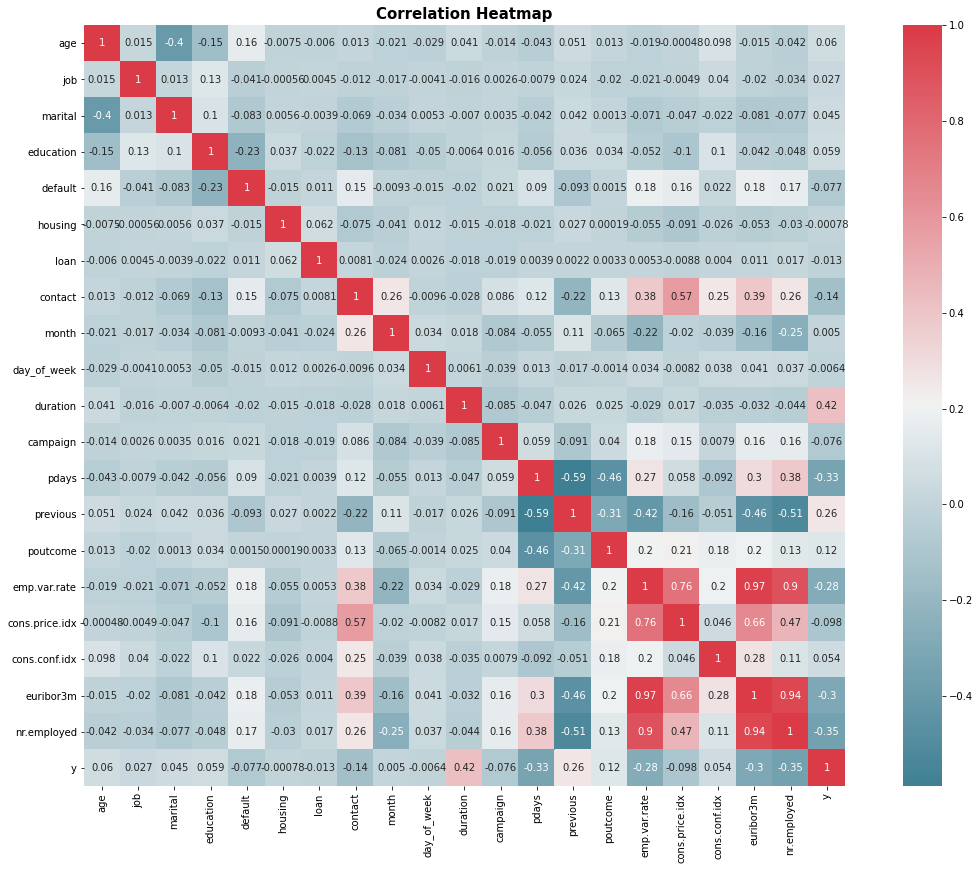

In [52]:
plt.figure(figsize = (21,14))
sns.heatmap(df_num.corr(), 
            annot = True, 
            square = True, 
            cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap', fontweight='bold', fontsize=15)
plt.show()

#### Duration:

pada notes dataset variabel "duration" tidak memberikan prediksi yang baik untuk nilai potensi "yes", karena jika nilai 0 maka otomatis memberikan hasil "no" 

### Modeling data
mengetahui variable yang digunakan untuk modeling. menggunakan keseluruhan data baik numeric maupun categorial.

In [41]:
# membuat copy data

df2 = df.drop(columns=['duration', 'previous']).copy()
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,2,999,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,4,999,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,1,0,1,4,4,1,999,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,0,1,1,4,0,3,999,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,1,0,0,7,1,1,999,1,-0.1,93.200,-42.0,4.191,5195.8,0


# DATA EVALUATION

In [126]:
import csv
import random

# def train_test_split(filename, split, X_test = [], X_train = [], y_test = [], y_train = []):
def train_test_split(filename, split, train_set = [], test_set = []):
    with open(filename) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(1, len(dataset)):
            for y in range(18):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                test_set.append(dataset[x])
                # X_test.append(dataset[x][:18])
                # y_test.append(dataset[x][-1])
            else:
                train_set.append(dataset[x])
                # X_train.append(dataset[x][:18])
                # y_train.append(dataset[x][-1])

In [127]:
import math

def euclidean_dist(sample1, sample2, length):
    distance = 0
    for x in range(length):
        distance += pow((sample1[x] - sample2[x]), 2)
    return math.sqrt(distance)

In [128]:
import operator

def get_neighbors(train_set, test_sample, k):
    distance = []
    neighbors = []

    length = len(test_sample) - 1
    for x in range(len(train_set)):
        dist = euclidean_dist(test_sample, train_set[x], length)
        distance.append((train_set[x], dist))
    
    distance.sort(key = operator.itemgetter(1))
    for x in range(k):
        neighbors.append(distance[x][0])
    return neighbors

In [129]:
# get prediction

def get_prediction(neighbors):
    class_votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
    sorted_class_votes = sorted(class_votes.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_class_votes[0][0]

In [130]:
# kalkulasi akurasi dalam %
# accuracy metric

def confusion_accuracy(test_set, predictions):
    correct = 0
    for x in range(len(test_set)):
        if test_set[x][-1] == predictions[x]:
            correct += 1
        else:
            correct = correct
    return round((correct/float(len(test_set))) * 100.0, 2)

In [131]:
def calculate_mean(accuracy_percentage_list):
	sum = 0
    
	for i in range(len(accuracy_percentage_list)):
		sum = sum + float(accuracy_percentage_list[i])
	mean = sum/len(accuracy_percentage_list)
	return mean

In [132]:
# kalkulasi standar deviasi akurasi

def calculate_standard_deviation(accuracy_percentage_list, mean):
	diff_sq = 0

	for i in range(len(accuracy_percentage_list)):
		diff_sq = diff_sq + pow((accuracy_percentage_list[i] - mean), 2)

	diff_sq = diff_sq/len(accuracy_percentage_list)
	return math.sqrt(diff_sq)

In [133]:
df2.to_csv('bank_new.csv', index = False)

In [134]:
# prepare data

train_set = []
test_set = []

# X_test = []
# X_train = []
# y_test = []
# y_train = []

split = 0.2

# train_test_split('bank_new.csv', split, X_test, X_train, y_test, y_train)
train_test_split('bank_new.csv', split, train_set, test_set)

print ('Train set size: ' + repr(len(train_set)))
print ('Test set size: ' + repr(len(test_set)))

Train set size: 3300
Test set size: 819


# CLASSIFICATION

In [135]:
max_prediction = []
max_accuracy = 0
accuracy_percentage_list = []
errors = []

for k in range(2, 12):
    predictions = []
    y_test = []

    for x in range(len(test_set)):
        neighbors = get_neighbors(train_set, test_set[x], k)
        result = get_prediction(neighbors)
        predictions.append(result)
        y_test.append(test_set[x][-1])

    errors.append(np.mean(np.array(predictions) != y_test))
    accuracy = confusion_accuracy(test_set, predictions)

    if(accuracy > max_accuracy):
        max_accuracy = accuracy
        max_prediction = predictions

    print('Accuracy k'+ ' = ' + repr(k) + " " + repr(accuracy) + '%')
    accuracy_percentage_list.append(accuracy)
    

Accuracy k = 2 86.81%
Accuracy k = 3 89.13%
Accuracy k = 4 88.64%
Accuracy k = 5 89.26%
Accuracy k = 6 88.52%
Accuracy k = 7 89.26%
Accuracy k = 8 88.89%
Accuracy k = 9 89.26%
Accuracy k = 10 89.13%
Accuracy k = 11 89.87%


In [136]:
mean = calculate_mean(accuracy_percentage_list)
sd = calculate_standard_deviation(accuracy_percentage_list, mean)

print('Mean: ' + repr(mean))
print('Standard Deviation: ' + repr(sd))

Mean: 88.877
Standard Deviation: 0.7752683406408397


In [137]:
errors

[0.13186813186813187,
 0.10866910866910867,
 0.11355311355311355,
 0.10744810744810745,
 0.11477411477411477,
 0.10744810744810745,
 0.1111111111111111,
 0.10744810744810745,
 0.10866910866910867,
 0.10134310134310134]

Text(0, 0.5, 'error')

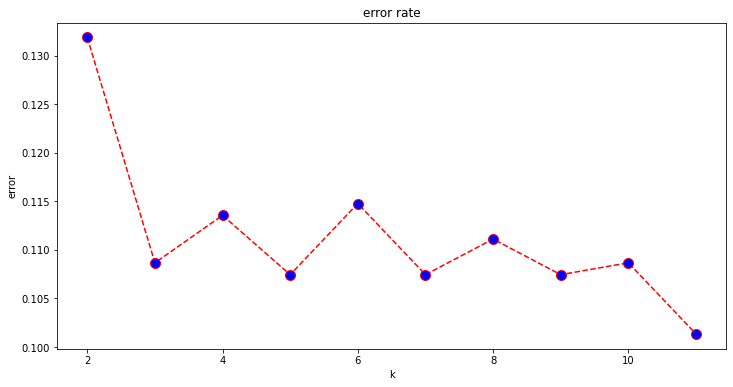

In [138]:
plt.figure(figsize = (12, 6))  
plt.plot(range(2, 12), errors, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('error rate')  
plt.xlabel('k')  
plt.ylabel('error')

In [139]:
y_pred = np.array(max_prediction)

In [140]:
y_test = []

for x in range(len(test_set)):
    y_test.append(test_set[x][-1])
    
y_test = np.array(y_test)

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

In [142]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Oranges):
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

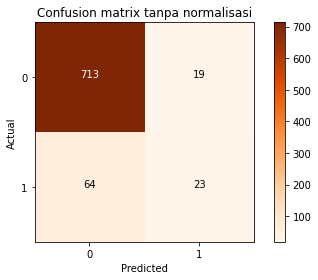

In [143]:
plt.figure()
plot_confusion_matrix(cm, classes=['0', '1'], title='Confusion matrix tanpa normalisasi')

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       732
           1       0.55      0.26      0.36        87

    accuracy                           0.90       819
   macro avg       0.73      0.62      0.65       819
weighted avg       0.88      0.90      0.88       819



In [152]:
def predict_new(predict, k):
    neighbors = get_neighbors(train_set, predict, k)
    result = get_prediction(neighbors)
    return result

In [153]:
predict = [38, 7, 1, 2, 0, 1, 1, 1, 4, 0, 3, 999, 1, 1.4, 94.465, -41.8, 4.959, 5228,1]
predict_new(predict, 11)

'0'

In [147]:
# colors = {0:'red', 1:'blue'}

# fig, ax = plt.subplots()
# grouped = df.groupby('y')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='age', y='month', label=key, color=colors[key])
# plt.show()

In [148]:
# plt.figure(figsize=(8,6))
# plt.scatter(df_num['cons.price.idx'],df_num['y'])
# plt.show()

In [149]:
# n_col = 5
# n_row = math.ceil(float(df.shape[1]) / n_col)

# fig, axes = plt.subplots(n_row, n_col,figsize=(15,12))
# for i in range(df.shape[1]-1):
#     df.iloc[:,i+1].plot.hist(bins=25,ax=axes[math.floor(i/n_row),i-n_col*math.floor(i/n_row)],title=df.columns.values[i+1])

# plt.show()